In [96]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [206]:
cd "C:/Users/onero/Pictures/images/Model/Telco"

C:\Users\onero\Pictures\images\Model\Telco


In [97]:
# importing data sets 

df=pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option("display.max_columns",None)

In [98]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
df.shape

(7043, 21)

In [100]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
#  percentage of null values

df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [102]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Average monthly charged are USD 65 whereas 25% customers pay more than USD 90 per month.

Text(0.5, 1.0, 'Countplot of yes/No ')

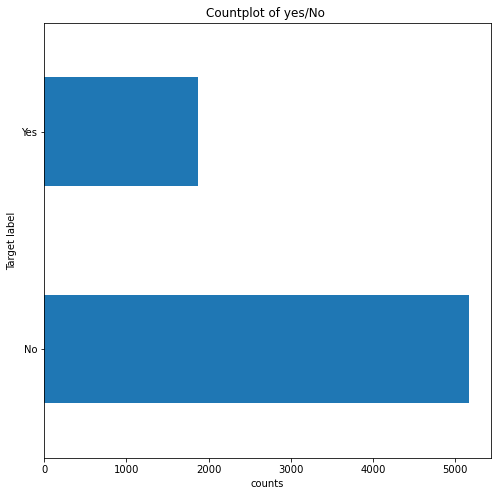

In [103]:
# Check the imbalance data set

df['Churn'].value_counts().plot(kind='barh',figsize=(8,8))
plt.xlabel('counts')
plt.ylabel('Target label')
plt.title('Countplot of yes/No ')

In [104]:
df['Churn'].value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**The ratio is 73:27 which indicates the data is imbalanced** 

In [105]:
mis_data=pd.DataFrame((df.isnull().sum()*100/df.shape[0]).reset_index())
mis_data

,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


Text(0.5, 1.0, 'percentage of missing value')

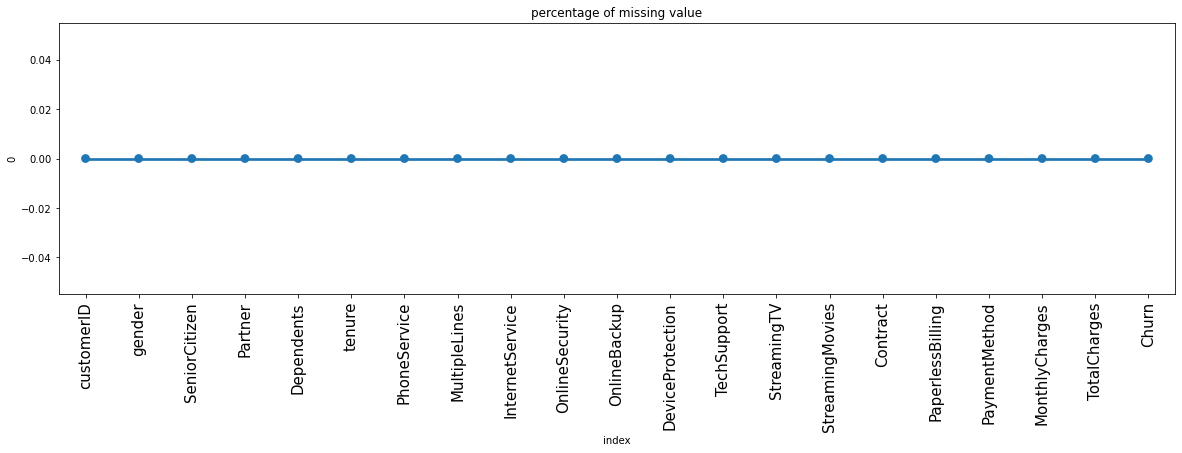

In [106]:
plt.figure(figsize=(20,5))
sns.pointplot('index',0,data=mis_data)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing value")

* No missing value in data
* Features with high missing values gives very less insight in analysis.


### Data cleaning

1 ) create the copy of data for manipulations and processing.


In [107]:
telco_df=df.copy()

2) Total charges should be numeric not object so let's convert it into numeric.

In [108]:
telco_df.TotalCharges=pd.to_numeric(telco_df.TotalCharges,errors='coerce')


In [109]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [110]:
telco_df.isnull().sum()/len(telco_df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

As we can see 11 missing values are there in TotalCharges let's check this value

In [111]:
telco_df.loc[telco_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


3) Missing value treatment

* Only 15% of data is missing from Total charges compared to all data so it is safe to drop them for further processing.

In [112]:
telco_df.dropna(how='any',inplace=True)

In [113]:
telco_df['TotalCharges'].isnull().sum()

0

4) Divide customers into bins of tenure. for tenure<10 months assign a tenure group of 1-10 ,for tenure between 1-2years assign a tenure group of 13-24 and so on.

In [114]:
# max tenure

telco_df['tenure'].max()

72

In [115]:
# min tenure
telco_df['tenure'].min()

1

so minimum no of months customers has subscribed is 1 and maximum is 72 months. 

In [116]:
# Group the tenure into 12 months
labels=["{}-{}".format(i,i+11) for i in range(1,72,12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [117]:
telco_df['tenure_group']=pd.cut(telco_df.tenure,range(1,80,12),right=False,labels=labels)

In [118]:
telco_df['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_group, dtype: int64

5) Removing columns which isn't required

In [119]:
telco_df.drop(['tenure','customerID'],axis=1,inplace=True)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration


plot distribution of individual predictor by churn

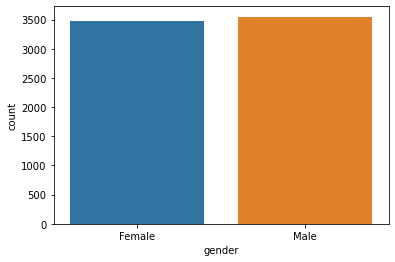

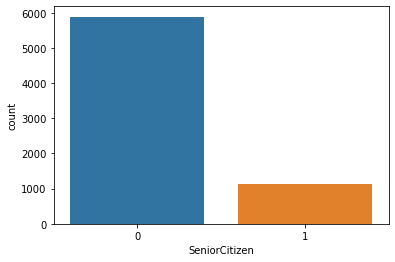

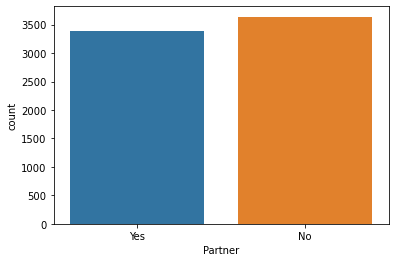

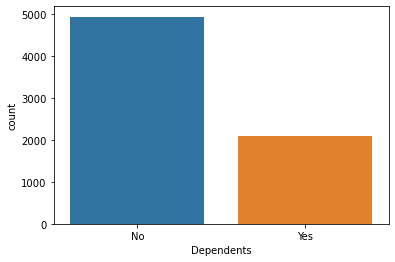

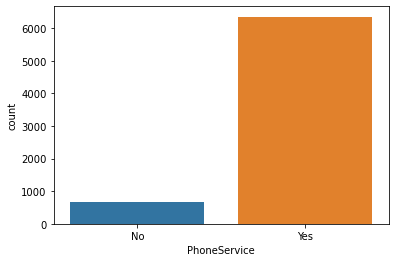

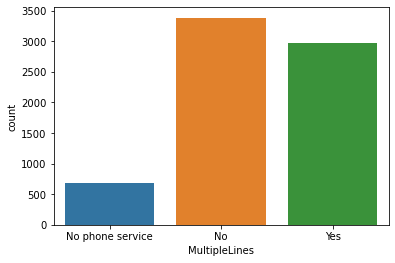

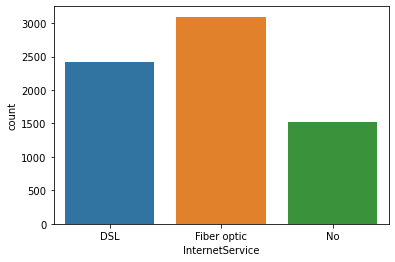

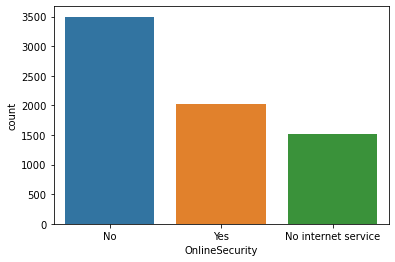

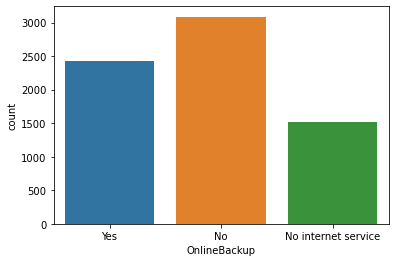

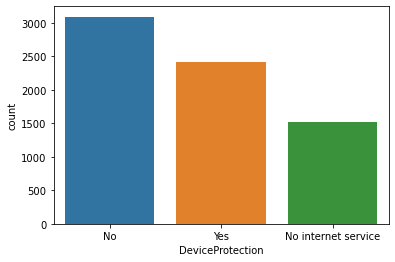

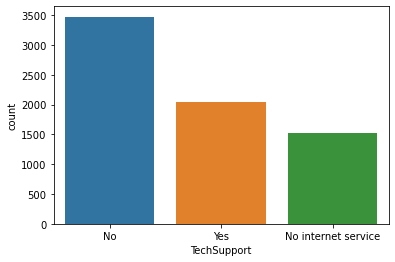

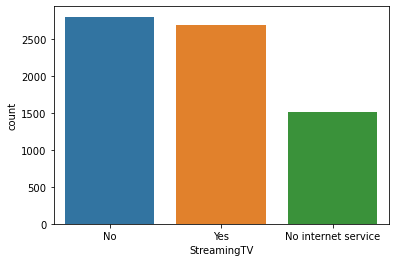

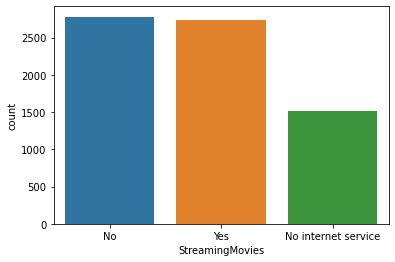

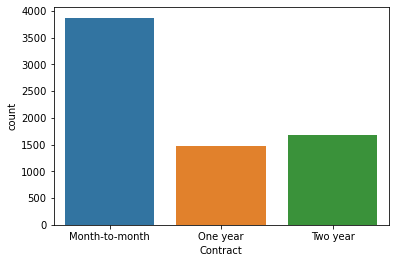

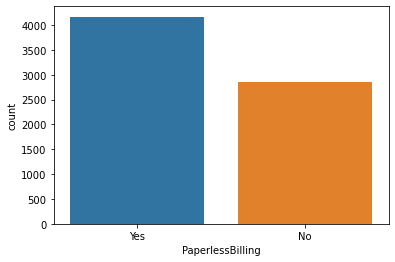

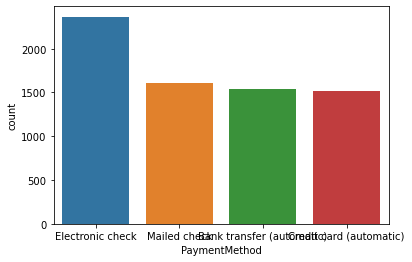

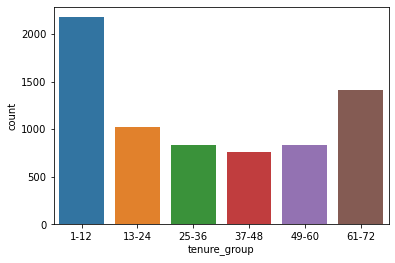

In [120]:
for j,predictor in enumerate(telco_df.drop(['Churn','MonthlyCharges','TotalCharges'],axis=1)):
    plt.figure(j)
    sns.countplot(data=telco_df,x=predictor)

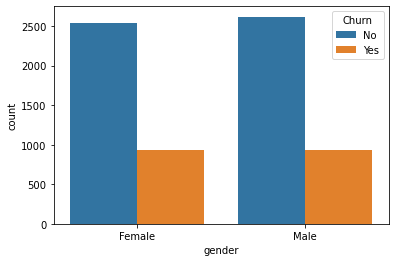

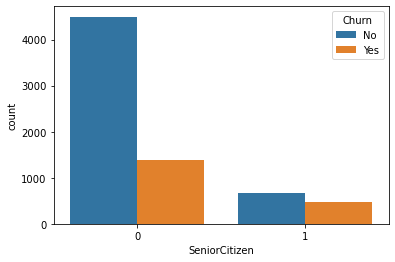

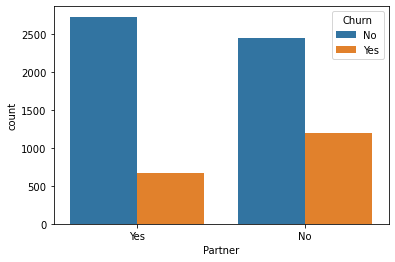

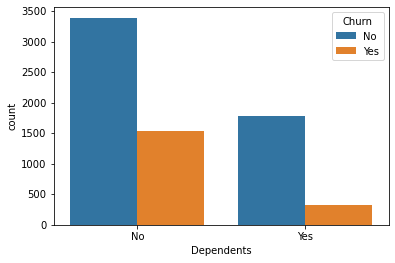

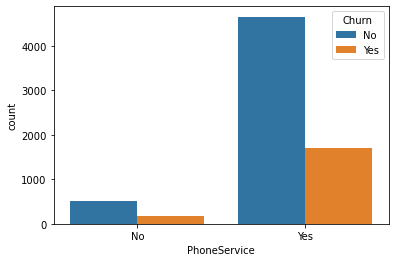

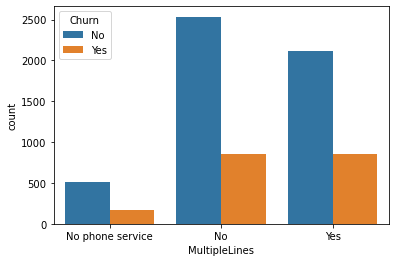

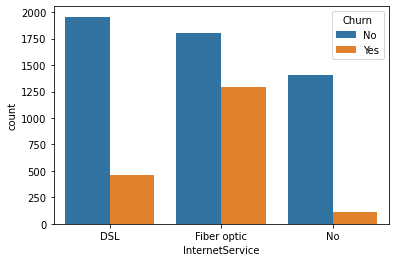

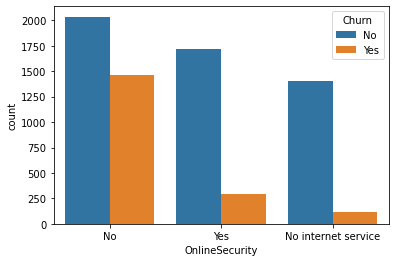

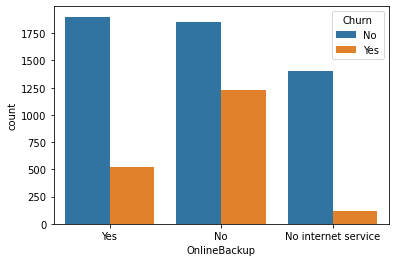

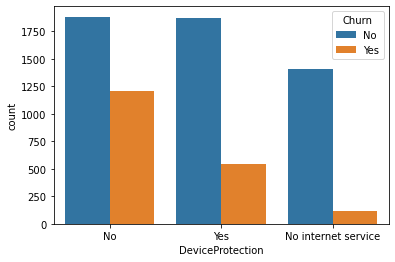

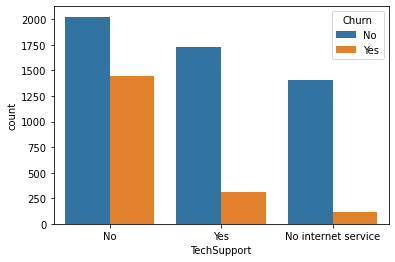

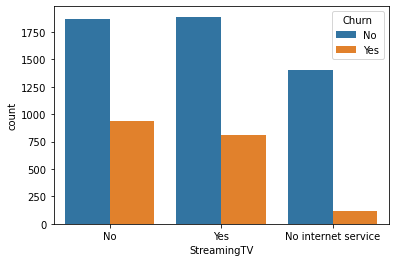

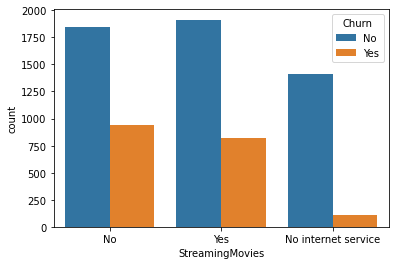

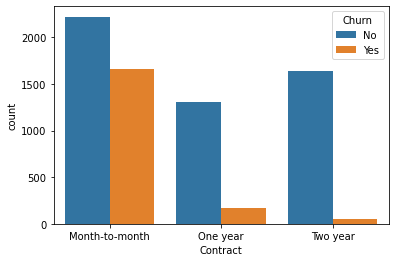

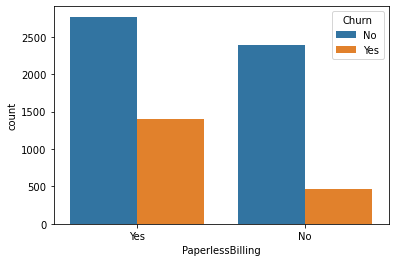

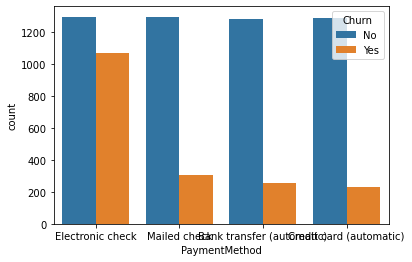

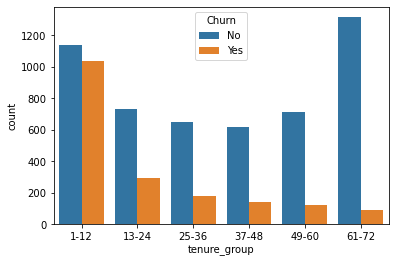

In [121]:
for i ,predictor in enumerate(telco_df.drop(['Churn','MonthlyCharges','TotalCharges'],axis=1)):
    plt.figure(i)
    sns.countplot(data=telco_df,x=predictor,hue='Churn')

2) Convert target varibale "Churn" to binary numeric variable

In [122]:
telco_df['Churn']=np.where(telco_df['Churn']=='Yes',1,0)

In [123]:
telco_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

3) Convert categorical variable into dummies variable

In [124]:
data_dummies=pd.get_dummies(telco_df)

In [125]:
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [126]:
data_dummies.shape

(7032, 51)

now the no of predictors have been increased 

4) Let's find the relation between monthly charges and total charges

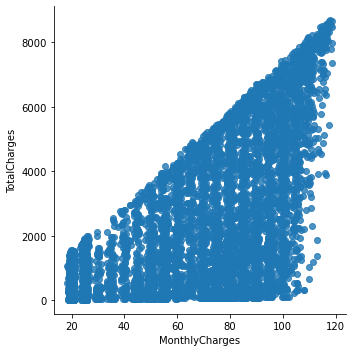

In [127]:
sns.lmplot(data=data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

As expected that if totalcharges increased monthly charges also increases.

5) Churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

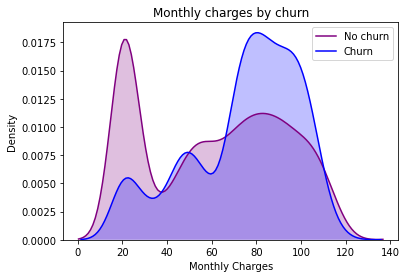

In [128]:
ax=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==0)],shade=True,color='purple')
ax=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==1)],shade=True,color='blue',ax=ax)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.legend(['No churn','Churn'],loc='upper right')
ax.set_title('Monthly charges by churn')

From above distribution we observed that as monthly charges increased their is hight chance that customer will churn.

Text(0.5, 1.0, 'Total charges by churn')

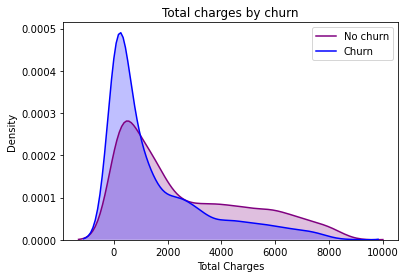

In [129]:
ax=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==0)],shade=True,color='purple')
ax=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==1)],shade=True,color='blue',ax=ax)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.legend(['No churn','Churn'],loc='upper right')
ax.set_title('Total charges by churn')

* Customer with low total charges are more likely to churn .

* Insights:The customer with low **total charges** ,**high monthly charges** and **tenure between 1-12** are more likely to be **churned**


6) checking the outliers in continuos variable

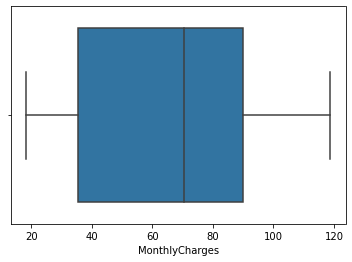

In [130]:
sns.boxplot(data_dummies['MonthlyCharges'])

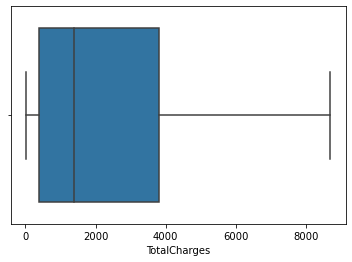

In [131]:
sns.boxplot(data_dummies['TotalCharges'])

In [132]:
data_dummies[['MonthlyCharges','TotalCharges']].skew()

MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

TotalCharges is highly right skewed and it tells that 25% customers are pay more than USD 4000 total charges.

### Bivariate analysis

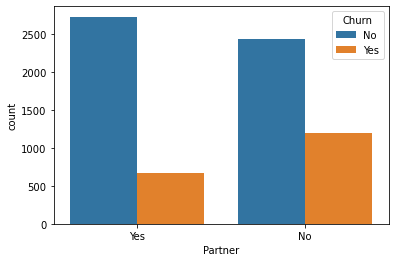

In [133]:
sns.countplot(x='Partner',data=df,hue='Churn')

In [134]:
non_churn=telco_df[telco_df['Churn']==0]
churn=telco_df[telco_df['Churn']==1]

### Feature selection for model building

In [135]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [136]:
# object data
data=[i for i in telco_df if telco_df[i].dtype=='object']

In [137]:
feature=telco_df[data]
feature.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [138]:
feature['gender']=np.where(feature['gender']=='Male',1,0)
feature['Partner']=np.where(feature['Partner']=='Yes',1,0)
feature['Dependents']=np.where(feature['Dependents']=='Yes',1,0)
feature['PhoneService']=np.where(feature['PhoneService']=='Yes',1,0)
feature['OnlineSecurity']=np.where(feature['OnlineSecurity']=='Yes',1,0)
feature['OnlineBackup']=np.where(feature['OnlineBackup']=='Yes',1,0)
feature['DeviceProtection']=np.where(feature['DeviceProtection']=='Yes',1,0)
feature['TechSupport']=np.where(feature['TechSupport']=='Yes',1,0)
feature['StreamingTV']=np.where(feature['StreamingTV']=='Yes',1,0)
feature['StreamingMovies']=np.where(feature['StreamingMovies']=='Yes',1,0)
feature['PaperlessBilling']=np.where(feature['PaperlessBilling']=='Yes',1,0)


In [139]:
ordinal_label={k:i for i,k in enumerate(feature['Contract'].unique())}
feature['Contract']=feature['Contract'].map(ordinal_label)

In [140]:
ordinal_label={k:i for i,k in enumerate(feature['PaymentMethod'].unique())}
feature['PaymentMethod']=feature['PaymentMethod'].map(ordinal_label)

In [141]:
ordinal_label={k:i for i,k in enumerate(feature['MultipleLines'].unique())}
feature['MultipleLines']=feature['MultipleLines'].map(ordinal_label)

In [142]:
ordinal_label={k:i for i,k in enumerate(feature['InternetService'].unique())}
feature['InternetService']=feature['InternetService'].map(ordinal_label)

In [143]:
feature.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1
2,1,0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,1,0,0,0,0,0,1,0,1,1,0,0,1,0,2
4,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0


In [144]:
feature_selec=pd.concat([feature,telco_df['Churn']],axis=1)

In [145]:
feature_selec.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0
2,1,0,0,1,1,0,1,1,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,1,0,1,1,0,0,1,0,2,0
4,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1


In [146]:
X=feature_selec.drop(['Churn'],axis=1)
Y=feature_selec.Churn

In [147]:
chi_p_value=chi2(X,Y)

In [148]:
chi_p_value

(array([2.54297062e-01, 8.18577694e+01, 1.31271509e+02, 9.29483891e-02,
        2.86250712e+00, 9.71526930e+00, 1.47165601e+02, 3.12098318e+01,
        2.02160070e+01, 1.35439602e+02, 1.73206148e+01, 1.59306111e+01,
        1.11175905e+03, 1.04979224e+02, 4.88182700e+02]),
 array([6.14065505e-001, 1.46240915e-019, 2.15953960e-030, 7.60461827e-001,
        9.06660842e-002, 1.82743300e-003, 7.21988253e-034, 2.31590182e-008,
        6.91717063e-006, 2.64595220e-031, 3.15742928e-005, 6.57073922e-005,
        9.18615368e-244, 1.23423173e-024, 3.54190931e-108]))

In [149]:
p_value=pd.DataFrame(chi_p_value[1])
p_value.index=feature.columns

In [150]:
p_value.sort_index(ascending=False)

,0
gender,6.140655e-01
TechSupport,2.645952e-31
StreamingTV,3.157429e-05
StreamingMovies,6.570739e-05
PhoneService,7.604618e-01
PaymentMethod,3.541909e-108
Partner,1.462409e-19
PaperlessBilling,1.234232e-24
OnlineSecurity,7.219883e-34
OnlineBackup,2.315902e-08


Now we select the feature having p_value < 0.05 

In [151]:
feature_selected=[i for i in p_value[0] if i<=0.05]

In [152]:
feature_selected

[1.4624091492682525e-19,
 2.159539604878587e-30,
 0.001827432998814319,
 7.219882528593977e-34,
 2.3159018157251026e-08,
 6.917170629742512e-06,
 2.645952202437101e-31,
 3.1574292822260756e-05,
 6.570739220869369e-05,
 9.186153682901536e-244,
 1.2342317320100526e-24,
 3.5419093070600486e-108]

gender , phone service and multiple lines these 3 variables are not significant.so we will remove these features .

In [153]:
sign_feat=feature_selec.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [154]:
sign_feat.columns

Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [155]:
# now we add the monthly and total charges in the data for model building

In [156]:
DF=pd.concat([sign_feat,telco_df['MonthlyCharges'],telco_df['TotalCharges']],axis=1)
DF.head()

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,1,0,0,0,1,0,0,0,0,0,1,0,0,29.85,29.85
1,0,0,0,1,0,1,0,0,0,1,0,1,0,56.95,1889.50
2,0,0,0,1,1,0,0,0,0,0,1,1,1,53.85,108.15
3,0,0,0,1,0,1,1,0,0,1,0,2,0,42.30,1840.75
4,0,0,1,0,0,0,0,0,0,0,1,0,1,70.70,151.65


In [157]:
DF.shape

(7032, 15)

### Model building

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek

In [159]:
# creating x and y 

X=DF.drop(['Churn'],axis=1)

In [160]:
X.shape

(7032, 14)

In [161]:
y=DF['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

### Logistic regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
lr=LogisticRegression()

In [165]:
lr.fit(X_train,y_train)

LogisticRegression()

In [166]:
y_pred=lr.predict(X_test)

In [167]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [168]:
print(confusion_matrix(y_test,y_pred))

[[916 122]
 [181 188]]


In [169]:
Accuracy=(916+188)/(916+188+122+181)
Accuracy

0.7846481876332623

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1038
           1       0.61      0.51      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



* From report we can observed that for non churners precision and recall is high and for churners it's low because the model is   trained more on non churners customer than churners.

* Now we use upsampling to balance the data for better precision and recall

* For imbalance data accuracy is cursed.

In [171]:
# handling imbalance data

sm=SMOTETomek(random_state=40)


In [172]:
x_resamp,y_resamp=sm.fit_resample(X,y)

In [173]:
y_resamp.value_counts()

1    4728
0    4728
Name: Churn, dtype: int64

In [174]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [175]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resamp,y_resamp,test_size=0.2)

In [176]:
LR=LogisticRegression()

In [177]:
LR.fit(xr_train,yr_train)

LogisticRegression()

In [178]:
yr_pred=LR.predict(xr_test)

In [179]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       955
           1       0.80      0.86      0.83       937

    accuracy                           0.82      1892
   macro avg       0.82      0.82      0.82      1892
weighted avg       0.82      0.82      0.82      1892



* After handling imbalance data the precision and recall is good for both non churners and churners customers.




In [180]:
print(confusion_matrix(yr_test,yr_pred))


[[747 208]
 [128 809]]


* Here the 195 is false positive which indicates number of customers who actually non churners but model predicted are churners.It is also called as type I error.
 
* 146 is false negative which indicates number of customers who actually churned but model predicted are non churners.It is also called as type II error.
 
* here type I error is sensitive for business because the customers who are loyal to company are predicted as churners so we need to reduce this false positive rate but we cann't directly reduce the number because we need domain expertise who will decide the threshol value.

In [181]:
Accuracy=(767+784)/(767+784+195+146)
Accuracy

0.8197674418604651

### Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
RF=RandomForestClassifier()

In [184]:
RF.fit(xr_train,yr_train)

RandomForestClassifier()

In [185]:
y_pred=RF.predict(xr_test)

In [186]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       955
           1       0.80      0.86      0.83       937

    accuracy                           0.82      1892
   macro avg       0.82      0.82      0.82      1892
weighted avg       0.82      0.82      0.82      1892



In [187]:
print(confusion_matrix(yr_test,yr_pred))

[[747 208]
 [128 809]]


In [188]:
## Hyperparameter tuning for finding best parameter

# grid search cv

# Number of trees in random forest
n_estimators=[60,100,120]

# maximum no of level in tree
max_depth=[2,8,None]


# number of feature to consider at every split

max_features=[0.2,0.6,1.0]

max_samples=[0.5,0.75,1.0]

# 108 different random forest train

In [189]:
param_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'max_features':max_features,
              'max_samples':max_samples}

print(param_grid)

{'n_estimators': [60, 100, 120], 'max_depth': [2, 8, None], 'max_features': [0.2, 0.6, 1.0], 'max_samples': [0.5, 0.75, 1.0]}


In [190]:

from sklearn.model_selection import GridSearchCV

In [191]:
grid=GridSearchCV(estimator=RF,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)

In [192]:
grid.fit(xr_train,yr_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [60, 100, 120]},
             verbose=2)

In [193]:
grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 120}

In [194]:
grid.best_score_

0.8491541560444403

In [195]:
yp=grid.predict(xr_test)

In [196]:
yp

array([0, 0, 0, ..., 0, 1, 1])

In [197]:
print(classification_report(yr_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       955
           1       0.84      0.88      0.86       937

    accuracy                           0.86      1892
   macro avg       0.86      0.86      0.86      1892
weighted avg       0.86      0.86      0.86      1892



### Model saving

In [207]:
import pickle

In [208]:
with open("grid_pkl",'wb') as f:
    pickle.dump(grid,f)

In [209]:
with open("grid_pkl",'rb') as f:
    model=pickle.load(f)

In [212]:
model.predict([[1,0,0,0,1,0,0,0,0,0,1,29.85,0,29.85]])

array([0])